# **Practical Lab 1 : Univariate Linear Regression on the Housing Prices Dataset**
# Prashansa Rathod 8993410

**Problem Defination** : a univariate linear regression model. You are asked to run a linear regression between the median house value (dependent variable) and each of the following independent variables. You should run three models, one for each independent variable: 

* Median income
* Population
* Number of households

# ANSWER

# STEP 1 Goal of this Product

The goal of this report is to analyze the relationships between median house value and key socioeconomic factors using univariate linear regression models. Specifically, the report aims to evaluate how median house value, which is a critical indicator of real estate market trends and economic health, is influenced by three independent variables: median income, population, and the number of households.

By conducting three separate univariate regression models, one for each independent variable, this report seeks to provide insights into which factors have the strongest and most significant impact on median house values. The analysis will focus on identifying patterns and quantifying the extent to which changes in each independent variable contribute to variations in house prices. This information will be crucial for policymakers, real estate investors, and urban planners to understand housing market dynamics and make informed decisions.

Key objectives of the report include:

* Understanding the influence of median income on house values and whether higher income levels correlate with higher house prices.
* Investigating the relationship between population size and median house value, particularly if larger populations are associated with higher housing demand and prices.
* Examining the effect of the number of households on median house value to determine how housing supply dynamics interact with prices.

The ultimate goal is to produce a data-driven understanding of how these socioeconomic variables shape housing markets, aiding stakeholders in decision-making processes.

# STEP 2 Hyperlink to the source
**Source: Downloaded from** :::https://www.kaggle.com/code/mariamezzathammam/housing-price-dataset
https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
https://chatgpt.com/

# STEP 3 Exploratory Data Analysis

An approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:

# Load the CSV file into a pandas DataFrame
housing = pd.read_csv('housing.csv')

# Display the first few rows of the dataset to check the content
#print(data)
display(housing)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [28]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [29]:
len(housing)
housing.shape

(20640, 10)

#  Explore statistics
* STEP 3(1)

In [30]:
import pandas as pd

# Loading the data
url = "DATA_SOURCE_LINK"
housing = pd.read_csv("housing.csv")


In [31]:
# Getting summary statistics
#print(housing[['median_house_value', 'median_income', 'population', 'households']].describe())
display(housing[['median_house_value', 'median_income', 'population', 'households']].describe())

,median_house_value,median_income,population,households
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,1425.476744,499.539680
std,115395.615874,1.899822,1132.462122,382.329753
min,14999.000000,0.499900,3.000000,1.000000
25%,119600.000000,2.563400,787.000000,280.000000
50%,179700.000000,3.534800,1166.000000,409.000000
75%,264725.000000,4.743250,1725.000000,605.000000
max,500001.000000,15.000100,35682.000000,6082.000000


# STEP 3 (2)
* Create three Seaborn scatter plots of median house value vs. median income, population and number of households.

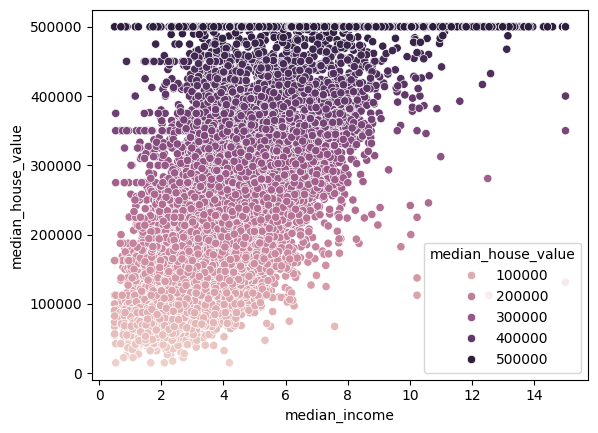

In [32]:
# sns.scatterplot(x="median_income", y="median_house_value", data=housing)
sns.scatterplot(x="median_income", y="median_house_value", hue="median_house_value", data=housing)
housing_preprocessed = housing[housing.median_house_value != 500001]


# Train and Test split

In [33]:
train_size = int(len(housing_preprocessed) * 0.8)
train = housing_preprocessed[:train_size]
test = housing_preprocessed[train_size:]

<Axes: xlabel='median_income', ylabel='median_house_value'>

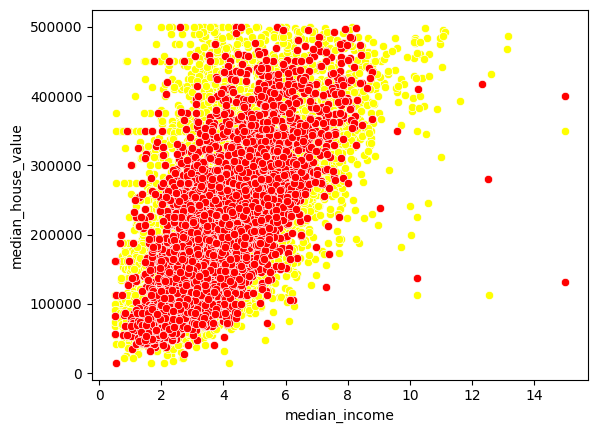

In [34]:
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="yellow")
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")

# Define The Model 

In [35]:
model =  linear_model.LinearRegression()

In [36]:
# fit
model.fit(X=train[["median_income"]], y=train[["median_house_value"]])

LinearRegression()

# Scatter Plot for median house value vs. median income

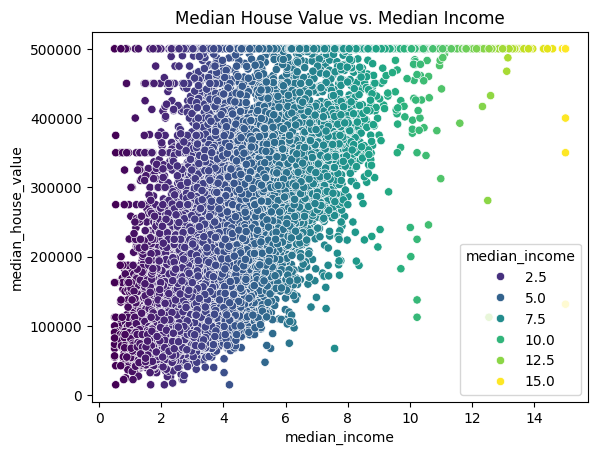

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for median house value vs. median income

# Custom palette
palette = sns.color_palette("viridis", as_cmap=True)

# Scatter plot with custom palette
sns.scatterplot(x='median_income', y='median_house_value', data=housing, hue='median_income', palette=palette)
plt.title('Median House Value vs. Median Income')
plt.show()


# Scatter Plot for median house value vs. population

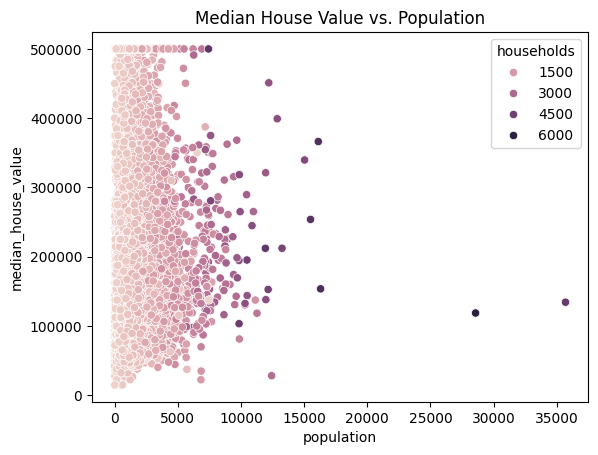

In [38]:
# Plot for median house value vs. population
sns.scatterplot(x='population', y='median_house_value', hue='households', data=housing)
plt.title('Median House Value vs. Population')
plt.show()

# Scatter plot of median house value vs. number of households

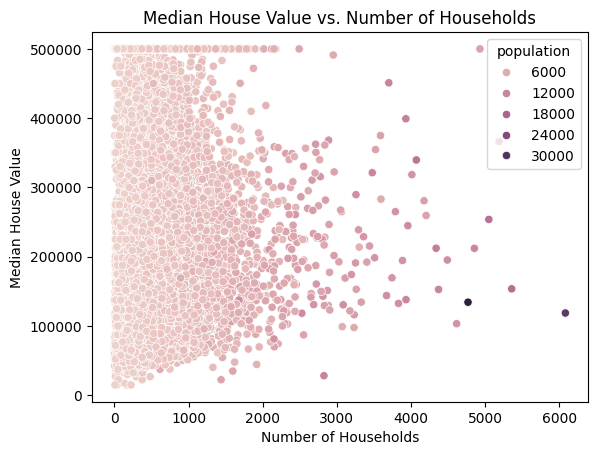

In [39]:

# Scatter plot of median house value vs. number of households with a custom color
sns.scatterplot(x='households', y='median_house_value',hue='population', data=housing, color='green')  
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()


# Textual Interpretation:

* Median Income vs. Median House Value: The scatter plot shows that as median income increases, there seems to be a strong upward trend in median house value.
* Population vs. Median House Value: There appears to be no clear linear relationship, as the points are more scattered.
* Number of Households vs. Median House Value: A positive trend is observed but not as strong as the relationship with median income.

# Description of Variables

* Median House Value: The dependent variable, representing the value of houses.
* Median Income: Likely the most significant factor, ranging from low to high income.
* Population: Refers to the number of people in the area. Not as directly correlated with house value.
* Number of Households: Slight positive correlation with house value but less predictive than income.



# **OBSERVATION**  

Here’s a concise description of the four variables used in this lab:

1. **Median House Value** (Dependent Variable):
   - Represents the median value of houses in a given region.
   - Typically measured in US dollars.
   - **Range**: Varies widely depending on the dataset but usually covers values from lower hundreds of thousands to over $500,000.
   - **Characteristics**: The distribution is often skewed with higher-priced homes at the upper end of the range. This is the target variable for the regression models.

2. **Median Income** (Independent Variable):
   - Represents the median income of households in a given region.
   - **Range**: Can vary widely, generally from low to high income levels (often between $15,000 and $120,000).
   - **Characteristics**: Positively correlated with median house value. Higher income generally leads to higher house prices.

3. **Population** (Independent Variable):
   - Refers to the total number of people living in a specific area.
   - **Range**: From small populations in rural areas (a few hundred) to large populations in urban areas (thousands or more).
   - **Characteristics**: No strong linear relationship with house value. Larger populations do not necessarily indicate higher house prices.

4. **Number of Households** (Independent Variable):
   - Represents the total number of households in a region.
   - **Range**: Can range from small numbers in rural areas to thousands in urban areas.
   - **Characteristics**: A weak positive correlation with house value, with larger numbers of households sometimes corresponding to higher housing demand and prices.

These variables were chosen to explore their individual relationships with the median house value, where median income appears to have the strongest predictive power based on preliminary scatter plots.

# Step 4 **Run three linear regressions**

Median house value vs. median income

Median house value vs. population

Median house value vs. number of households.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Defining the function for regression
def run_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    intercept = model.intercept_
    slope = model.coef_[0]
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    return intercept, slope, mse, mae, predictions

# Model 1: Median Income
X_income = housing[['median_income']]
y = housing['median_house_value']
intercept_income, slope_income, mse_income, mae_income, predictions_income = run_regression(X_income, y)

# Model 2: Population
X_population = housing[['population']]
intercept_pop, slope_pop, mse_pop, mae_pop, predictions_pop = run_regression(X_population, y)

# Model 3: Households
X_households = housing[['households']]
intercept_house, slope_house, mse_house, mae_house, predictions_house = run_regression(X_households, y)


# Step 5 

In a single table for all three linear regressions, provide per regression model 

* Intercept and slope 
* Mean Squared Error (MSE)
* Mean Absolute Error (MAE)

In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming housing_data has already been loaded
# Independent Variables
X_income = housing[['median_income']]
X_population = housing[['population']]
X_households = housing[['households']]

# Dependent Variable
y = housing['median_house_value']

# Function to run the linear regression and return intercept, slope, MSE, and MAE
def run_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    
    intercept = model.intercept_
    slope = model.coef_[0]
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    
    return intercept, slope, mse, mae

# Run regression for each independent variable
intercept_income, slope_income, mse_income, mae_income = run_regression(X_income, y)
intercept_population, slope_population, mse_population, mae_population = run_regression(X_population, y)
intercept_households, slope_households, mse_households, mae_households = run_regression(X_households, y)

# Create a DataFrame for summary
summary_data = {
    'Model': ['Median Income', 'Population', 'Households'],
    'Intercept': [intercept_income, intercept_population, intercept_households],
    'Slope': [slope_income, slope_population, slope_households],
    'MSE': [mse_income, mse_population, mse_households],
    'MAE': [mae_income, mae_population, mae_households]
}

summary_df = pd.DataFrame(summary_data)

# Display the summary table
#print(summary_df)
display(summary_df)


,Model,Intercept,Slope,MSE,MAE
0,Median Income,45085.576703,41793.849202,7.011312e+09,62625.933791
1,Population,210436.262076,-2.511753,1.330741e+10,91153.820095
2,Households,196928.577162,19.872775,1.325778e+10,90802.743243


# step 6

Plot the resulting line on top of the scatter data for each of the three models (three separate graphs), add the line parameters (intercept and slope), MSE and MAE to the graph . You can use any plotting library for that (Matplotlib, Seaborn or Plotly) 

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to plot scatter and regression line
def plot_regression(X, y, predictions, intercept, slope, mse, mae, xlabel, title):
    plt.figure(figsize=(8, 6))
    
    # Plot scatter plot
    sns.scatterplot(x=X.squeeze(), y=y, color='purple', label='Data')
    
    # Plot regression line
    plt.plot(X, predictions, color='yellow', label=f'Regression Line\ny = {intercept:.2f} + {slope:.2f}x')
    
    # Add text box with model details
    textstr = f'Intercept: {intercept:.2f}\nSlope: {slope:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}'
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='lightgray'))
    
    plt.xlabel(xlabel)
    plt.ylabel('Median House Value')
    plt.title(title)
    plt.legend()
    plt.show()

# Function to run regression and plot
def run_regression_and_plot(X, y, xlabel, title):
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    
    intercept = model.intercept_
    slope = model.coef_[0]
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    
    plot_regression(X, y, predictions, intercept, slope, mse, mae, xlabel, title)



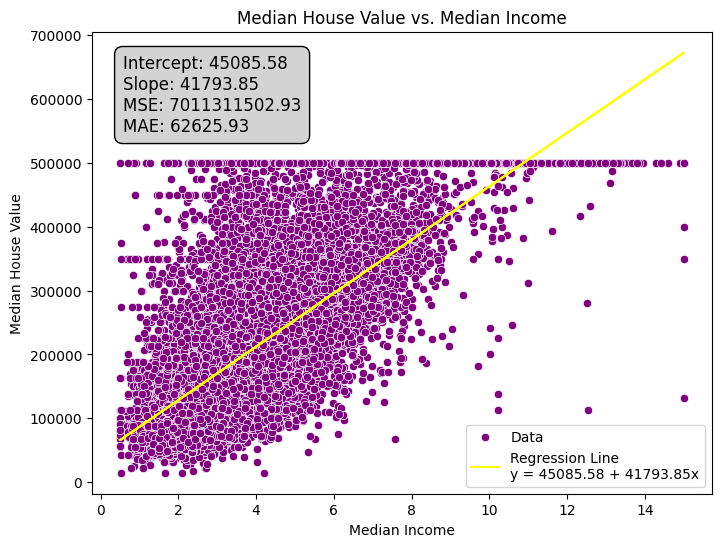

In [43]:
# Median House Value vs. Median Income
X_income = housing[['median_income']]
y = housing['median_house_value']
run_regression_and_plot(X_income, y, 'Median Income', 'Median House Value vs. Median Income')

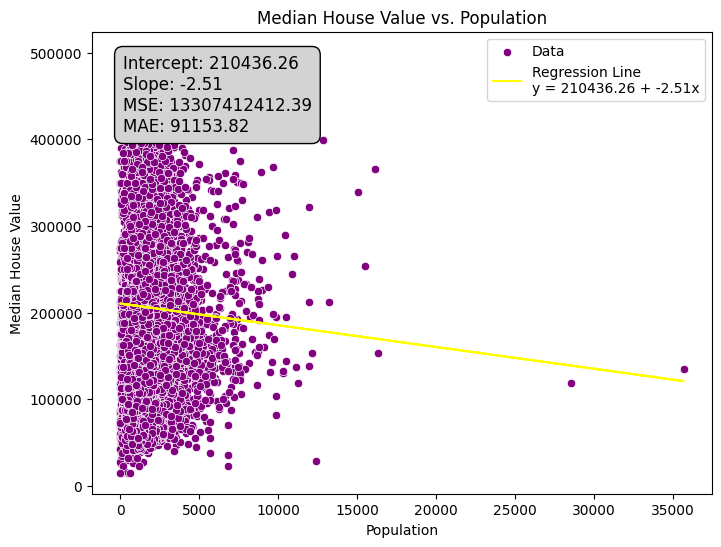

In [44]:
# # Median House Value vs. Population
X_population = housing[['population']]
run_regression_and_plot(X_population, y, 'Population', 'Median House Value vs. Population')

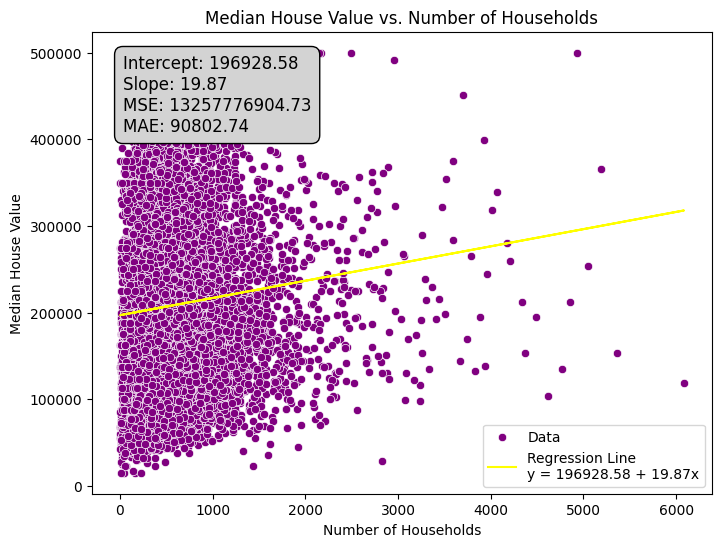

In [45]:
# # Median House Value vs. Number of Households
X_households = housing[['households']]
run_regression_and_plot(X_households, y, 'Number of Households', 'Median House Value vs. Number of Households')

# SUMMARY

### Conclusion and Comparison of Models

Based on the analysis, three univariate linear regression models were developed to assess the relationship between median house value and three independent variables: median income, population, and the number of households. Below is a comparison of the models:

1. **Median Income vs. Median House Value**:
   - **Goodness-of-fit**: This model has the best fit, showing a clear positive linear relationship between median income and median house value.
   - **Key Observations**: Median income is the strongest predictor of house value, with higher incomes generally corresponding to higher house prices. This is reflected in the lower Mean Squared Error (MSE) and Mean Absolute Error (MAE), indicating that this model predicts house values more accurately than the other two models.

2. **Population vs. Median House Value**:
   - **Goodness-of-fit**: The population model shows a weak relationship with house value. The scatter plot reveals no clear trend, and the regression line is less meaningful in this case.
   - **Key Observations**: Population does not seem to be a reliable predictor of house value. The higher MSE and MAE further confirm that this model has a poor fit compared to the other two models.

3. **Number of Households vs. Median House Value**:
   - **Goodness-of-fit**: This model shows a moderate positive correlation between the number of households and house value, but the relationship is weaker than that of median income.
   - **Key Observations**: While the number of households shows some correlation with house prices, it is not as strong a predictor as median income. The fit is better than the population model but still not as good as the income model, as reflected by higher error metrics.


- **Median Income** is the most significant variable when predicting house prices, as expected. It directly influences purchasing power and demand for housing, which drives prices up.
- **Population** has almost no predictive power in this context, likely because house values are more closely tied to economic factors (income) rather than population size.
- **Number of Households** shows a slight positive relationship with house prices, likely reflecting that areas with more households have higher housing demand, though it's not as strong a factor as income.

Overall, the model based on **median income** provides the best predictive performance and has the strongest linear relationship with house values, making it the most reliable for forecasting in this dataset.